In [2]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

Importing my datset which I sourced through Kaggle and creating pandas dataframe while setting index to name column

In [362]:
df=pd.read_csv("fifa_cleaned.csv")

Printing head of my data to make sure everything is displaying corrently and seeing what columns will be useful

In [363]:
df.head

<bound method NDFrame.head of            id            name                         full_name  birth_date  \
0      158023        L. Messi    Lionel Andrés Messi Cuccittini  1987-06-24   
1      190460      C. Eriksen      Christian  Dannemann Eriksen  1992-02-14   
2      195864        P. Pogba                        Paul Pogba  1993-03-15   
3      198219      L. Insigne                   Lorenzo Insigne  1991-06-04   
4      201024    K. Koulibaly                 Kalidou Koulibaly  1991-06-20   
...       ...             ...                               ...         ...   
17949  204322     R. McKenzie                    Rory  McKenzie  1993-10-07   
17950  239762       M. Sipľak                     Michal Sipľak  1996-02-02   
17951  235155      J. Bekkema                       Jan Bekkema  1996-04-09   
17952  244883      A. Al Yami               Abdulrahman Al Yami  1997-06-19   
17953  247187  Júnior Brumado  José Francisco dos Santos Júnior  1999-05-15   

       age  height_cm

Checking data columens for missing values

Viewing which country has the most top players using the groupby function

In [364]:
df.groupby(['nationality']).count()['full_name'].sort_values(ascending=False)

nationality
England          1658
Germany          1199
Spain            1070
France            925
Argentina         904
                 ... 
Guam                1
New Caledonia       1
Indonesia           1
St Lucia            1
Kuwait              1
Name: full_name, Length: 160, dtype: int64

Sorting values by who has the highest salary

In [365]:
salary = df[["name", "age", "wage_euro"]].sort_values(by=['wage_euro'], ascending=False)

In [366]:
salary

,name,age,wage_euro
0,L. Messi,31,565000.0
17938,L. Suárez,32,455000.0
17939,L. Modrić,33,420000.0
17944,Cristiano Ronaldo,34,405000.0
17941,K. De Bruyne,27,355000.0
...,...,...,...
17271,Luís Neto,30,NaN
17329,A. Dzyuba,30,NaN
17463,I. Smolnikov,30,NaN
17546,A. Lunev,27,NaN


Using .loc to view all details of certain players(rows)

In [367]:
players = df.loc[[0, 1]]

In [368]:
players

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3


Finding out which columens include missing values as we see there is a lot is some columns but I will be removing non relevant columns later on so i will deal with these then

In [369]:
df.isna().sum()

id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 92, dtype: int64

Running .info in order so see which columns aren't reveant and include missing values

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In the following code, I decide what columns I want to keep, I save this as df2 to create a new dataset so to avoid any confusion

In [371]:
df2 = df[['name', 'birth_date', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality', 'overall_rating', 'potential', 'value_euro', 'wage_euro', 'preferred_foot', 'club_team', 'club_rating', 'club_position']]

In [372]:
df2.head

<bound method NDFrame.head of                  name  birth_date  age  height_cm  weight_kgs  positions  \
0            L. Messi  1987-06-24   31     170.18        72.1   CF,RW,ST   
1          C. Eriksen  1992-02-14   27     154.94        76.2  CAM,RM,CM   
2            P. Pogba  1993-03-15   25     190.50        83.9     CM,CAM   
3          L. Insigne  1991-06-04   27     162.56        59.0      LW,ST   
4        K. Koulibaly  1991-06-20   27     187.96        88.9         CB   
...               ...         ...  ...        ...         ...        ...   
17949     R. McKenzie  1993-10-07   25     175.26        74.8  RM,CAM,CM   
17950       M. Sipľak  1996-02-02   23     182.88        79.8         LB   
17951      J. Bekkema  1996-04-09   22     185.42        89.8         GK   
17952      A. Al Yami  1997-06-19   21     175.26        64.9      ST,LM   
17953  Júnior Brumado  1999-05-15   19     190.50        79.8         ST   

        nationality  overall_rating  potential   value_eu

Viewing info of the columns I have chosen to keep to see if any missing values are present in order so see what data I need to clean

In [373]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17954 non-null  object 
 1   birth_date      17954 non-null  object 
 2   age             17954 non-null  int64  
 3   height_cm       17954 non-null  float64
 4   weight_kgs      17954 non-null  float64
 5   positions       17954 non-null  object 
 6   nationality     17954 non-null  object 
 7   overall_rating  17954 non-null  int64  
 8   potential       17954 non-null  int64  
 9   value_euro      17699 non-null  float64
 10  wage_euro       17708 non-null  float64
 11  preferred_foot  17954 non-null  object 
 12  club_team       17940 non-null  object 
 13  club_rating     17940 non-null  float64
 14  club_position   17940 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 2.1+ MB


I have no duplcate rows, I have duplicate values in columns but it makes no sense to remove these as attributes such as age, value can be the same amongst many players, I run the command below to show my understanding of this feature in pandas

In [374]:
df2.drop_duplicates()

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW
1,C. Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,Tottenham Hotspur,83.0,LCM
2,P. Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,Manchester United,82.0,LCM
3,L. Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,Napoli,82.0,LS
4,K. Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,Napoli,82.0,LCB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,1993-10-07,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,Kilmarnock,67.0,SUB
17950,M. Sipľak,1996-02-02,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,Cracovia,65.0,LB
17951,J. Bekkema,1996-04-09,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,SC Heerenveen,69.0,RES
17952,A. Al Yami,1997-06-19,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right,Al Hilal,74.0,RES


In [375]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17954 non-null  object 
 1   birth_date      17954 non-null  object 
 2   age             17954 non-null  int64  
 3   height_cm       17954 non-null  float64
 4   weight_kgs      17954 non-null  float64
 5   positions       17954 non-null  object 
 6   nationality     17954 non-null  object 
 7   overall_rating  17954 non-null  int64  
 8   potential       17954 non-null  int64  
 9   value_euro      17699 non-null  float64
 10  wage_euro       17708 non-null  float64
 11  preferred_foot  17954 non-null  object 
 12  club_team       17940 non-null  object 
 13  club_rating     17940 non-null  float64
 14  club_position   17940 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 2.1+ MB


Dropping the rows where columns have a null value. This allows me to work through my data with full values across all rows so we are ready to start analysing data, below I check the data info to ensure this

In [376]:
df2 = df2.dropna(subset=['club_team', 'club_rating', 'club_position'])

In [377]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17940 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17940 non-null  object 
 1   birth_date      17940 non-null  object 
 2   age             17940 non-null  int64  
 3   height_cm       17940 non-null  float64
 4   weight_kgs      17940 non-null  float64
 5   positions       17940 non-null  object 
 6   nationality     17940 non-null  object 
 7   overall_rating  17940 non-null  int64  
 8   potential       17940 non-null  int64  
 9   value_euro      17699 non-null  float64
 10  wage_euro       17708 non-null  float64
 11  preferred_foot  17940 non-null  object 
 12  club_team       17940 non-null  object 
 13  club_rating     17940 non-null  float64
 14  club_position   17940 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 2.2+ MB


Replacing Values that are missing data with standard deviation for value and median for wages

In [405]:
std_value=df2['value_euro'].std()

In [406]:
std_value

5660742.541321554

In [407]:
df2['value_euro'].fillna(value=df['value_euro'].std(), inplace=True)

C:\Users\markruane\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [408]:
median_value=df2['wage_euro'].median()

In [409]:
median_value

3000.0

In [410]:
df2['wage_euro'].fillna(value=df['wage_euro'].median(), inplace=True)

In [411]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17940 entries, 0 to 17953
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            17940 non-null  object 
 1   birth_date      17940 non-null  object 
 2   age             17940 non-null  int64  
 3   height_cm       17940 non-null  float64
 4   weight_kgs      17940 non-null  float64
 5   positions       17940 non-null  object 
 6   nationality     17940 non-null  object 
 7   overall_rating  17940 non-null  int64  
 8   potential       17940 non-null  int64  
 9   value_euro      17940 non-null  float64
 10  wage_euro       17940 non-null  float64
 11  preferred_foot  17940 non-null  object 
 12  club_team       17940 non-null  object 
 13  club_rating     17940 non-null  float64
 14  club_position   17940 non-null  object 
dtypes: float64(5), int64(3), object(7)
memory usage: 2.2+ MB


Below I import the dataframe I scraped from the web

In [385]:
df_pop=pd.read_csv("fifa_pop")

In [386]:
df_pop

,Unnamed: 0,Rank,Country,2022 Population,2021 Population,Growth Rate,Area,Density (km²)
0,0,1,China,1448471400,1.444216e+09,0.29%,9706961,149/km²
1,1,2,India,1406631776,1.393409e+09,0.95%,3287590,428/km²
2,2,3,United States,334805269,3.329151e+08,0.57%,9372610,36/km²
3,3,4,Indonesia,279134505,2.763618e+08,1.00%,1904569,147/km²
4,4,5,Pakistan,229488994,2.251999e+08,1.90%,881912,260/km²
...,...,...,...,...,...,...,...,...
204,204,205,San Marino,34085,3.401700e+04,0.20%,61,559/km²
205,205,206,Palau,18233,1.816900e+04,0.35%,459,40/km²
206,206,207,Tuvalu,12066,1.193100e+04,1.13%,26,464/km²
207,207,208,Nauru,10903,1.087600e+04,0.25%,21,519/km²


Merging DataFrames, I scraped a web site online to get the popluation per country, I will join this to the player database in order to compare players per population etc.

In [387]:
fulldf = pd.merge(df2, df_pop, left_on='nationality', right_on='Country')

In [388]:
fulldf

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,...,club_rating,club_position,Unnamed: 0,Rank,Country,2022 Population,2021 Population,Growth Rate,Area,Density (km²)
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,...,86.0,RW,32,33,Argentina,46010234,45605826.0,0.89%,2780400,17/km²
1,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,64500000.0,...,85.0,ST,32,33,Argentina,46010234,45605826.0,0.89%,2780400,17/km²
2,P. Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,94,89000000.0,...,85.0,RW,32,33,Argentina,46010234,45605826.0,0.89%,2780400,17/km²
3,G. Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,87,48500000.0,...,83.0,ST,32,33,Argentina,46010234,45605826.0,0.89%,2780400,17/km²
4,M. Icardi,1993-02-19,26,154.94,74.8,ST,Argentina,87,90,64500000.0,...,82.0,ST,32,33,Argentina,46010234,45605826.0,0.89%,2780400,17/km²
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,M. El-Munir,1992-04-08,26,152.40,76.2,"LB,LM",Libya,70,73,1800000.0,...,70.0,SUB,107,108,Libya,7040745,6958532.0,1.18%,1759540,4/km²
16608,I. Tajouri-Shradi,1994-03-28,24,170.18,68.9,"LW,RW,RM",Libya,71,76,3200000.0,...,69.0,RW,107,108,Libya,7040745,6958532.0,1.18%,1759540,4/km²
16609,A. Benali,1992-02-07,27,172.72,66.2,"CM,CF",Libya,72,73,3600000.0,...,69.0,LCM,107,108,Libya,7040745,6958532.0,1.18%,1759540,4/km²
16610,A. Al Habsi,1981-12-30,37,193.04,93.0,GK,Oman,72,72,425000.0,...,74.0,GK,122,123,Oman,5323993,5223375.0,1.93%,309500,17/km²


We get some columns we don't want from the new dataset which has been pulled in so, I drop these in the code below

In [389]:
fulldf_clean = fulldf[fulldf.columns[~fulldf.columns.isin(['Unnamed: 0', 'Rank', '2022 Population', 'Growth Rate', 'Area', 'Density (km²)'])]]

In [390]:
fulldf_clean

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,2021 Population
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,45605826.0
1,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,64500000.0,300000.0,Right,Manchester City,85.0,ST,Argentina,45605826.0
2,P. Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,94,89000000.0,205000.0,Left,Juventus,85.0,RW,Argentina,45605826.0
3,G. Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,87,48500000.0,205000.0,Right,Chelsea,83.0,ST,Argentina,45605826.0
4,M. Icardi,1993-02-19,26,154.94,74.8,ST,Argentina,87,90,64500000.0,130000.0,Right,Inter,82.0,ST,Argentina,45605826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,M. El-Munir,1992-04-08,26,152.40,76.2,"LB,LM",Libya,70,73,1800000.0,5000.0,Left,Los Angeles FC,70.0,SUB,Libya,6958532.0
16608,I. Tajouri-Shradi,1994-03-28,24,170.18,68.9,"LW,RW,RM",Libya,71,76,3200000.0,6000.0,Left,New York City FC,69.0,RW,Libya,6958532.0
16609,A. Benali,1992-02-07,27,172.72,66.2,"CM,CF",Libya,72,73,3600000.0,4000.0,Right,Crotone,69.0,LCM,Libya,6958532.0
16610,A. Al Habsi,1981-12-30,37,193.04,93.0,GK,Oman,72,72,425000.0,12000.0,Right,Al Hilal,74.0,GK,Oman,5223375.0


Final check to see if there is any missing values in any column of any row before starting analysing my data

In [391]:
fulldf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16612 entries, 0 to 16611
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16612 non-null  object 
 1   birth_date       16612 non-null  object 
 2   age              16612 non-null  int64  
 3   height_cm        16612 non-null  float64
 4   weight_kgs       16612 non-null  float64
 5   positions        16612 non-null  object 
 6   nationality      16612 non-null  object 
 7   overall_rating   16612 non-null  int64  
 8   potential        16612 non-null  int64  
 9   value_euro       16612 non-null  float64
 10  wage_euro        16612 non-null  float64
 11  preferred_foot   16612 non-null  object 
 12  club_team        16612 non-null  object 
 13  club_rating      16612 non-null  float64
 14  club_position    16612 non-null  object 
 15  Country          16612 non-null  object 
 16  2021 Population  14513 non-null  float64
dtypes: float64(6

There is so we drop these below and start to move on with the analysis

In [392]:
fulldf_clean = fulldf_clean.dropna()

In [393]:
fulldf_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14513 entries, 0 to 16611
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14513 non-null  object 
 1   birth_date       14513 non-null  object 
 2   age              14513 non-null  int64  
 3   height_cm        14513 non-null  float64
 4   weight_kgs       14513 non-null  float64
 5   positions        14513 non-null  object 
 6   nationality      14513 non-null  object 
 7   overall_rating   14513 non-null  int64  
 8   potential        14513 non-null  int64  
 9   value_euro       14513 non-null  float64
 10  wage_euro        14513 non-null  float64
 11  preferred_foot   14513 non-null  object 
 12  club_team        14513 non-null  object 
 13  club_rating      14513 non-null  float64
 14  club_position    14513 non-null  object 
 15  Country          14513 non-null  object 
 16  2021 Population  14513 non-null  float64
dtypes: float64(6

I created a function below which will print what stage of a career a sports person is. This can be used in other python dataframes in order to see what stage of a career a person is at in regards to sport. I used Experienced, Peak year and rising star

In [394]:
def my_function(age):
    print(age)
    if age > 30:
        print('Experienced')
    elif age > 21:
        print('Peak Years')
    else: 
        print('Rising Star')
    

In [463]:
my_function(19)

19
Rising Star


In [396]:
fulldf_clean

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,2021 Population
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,45605826.0
1,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,64500000.0,300000.0,Right,Manchester City,85.0,ST,Argentina,45605826.0
2,P. Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,94,89000000.0,205000.0,Left,Juventus,85.0,RW,Argentina,45605826.0
3,G. Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,87,48500000.0,205000.0,Right,Chelsea,83.0,ST,Argentina,45605826.0
4,M. Icardi,1993-02-19,26,154.94,74.8,ST,Argentina,87,90,64500000.0,130000.0,Right,Inter,82.0,ST,Argentina,45605826.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,M. El-Munir,1992-04-08,26,152.40,76.2,"LB,LM",Libya,70,73,1800000.0,5000.0,Left,Los Angeles FC,70.0,SUB,Libya,6958532.0
16608,I. Tajouri-Shradi,1994-03-28,24,170.18,68.9,"LW,RW,RM",Libya,71,76,3200000.0,6000.0,Left,New York City FC,69.0,RW,Libya,6958532.0
16609,A. Benali,1992-02-07,27,172.72,66.2,"CM,CF",Libya,72,73,3600000.0,4000.0,Right,Crotone,69.0,LCM,Libya,6958532.0
16610,A. Al Habsi,1981-12-30,37,193.04,93.0,GK,Oman,72,72,425000.0,12000.0,Right,Al Hilal,74.0,GK,Oman,5223375.0


I want to add a column which shows what level a player is at 

In [537]:
player_level = [
    (fulldf_clean['age'].between(30, 99)),
    (fulldf_clean['age'].between(24, 29)),
    (fulldf_clean['age'].between(15, 23))
    
    ]

In [538]:
values = ['Experienced', 'Peak Years', 'Rising Star']

In [539]:
fulldf_clean['Player Level'] = np.select(player_level, values)

In [540]:
fulldf_clean

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,club_team,club_rating,club_position,Country,2021 Population,Player Level
0,L. Messi,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,FC Barcelona,86.0,RW,Argentina,45605826.0,Experienced
1,S. Agüero,1988-06-02,30,172.72,69.9,ST,Argentina,89,89,64500000.0,300000.0,Right,Manchester City,85.0,ST,Argentina,45605826.0,Experienced
2,P. Dybala,1993-11-15,25,152.40,74.8,"CAM,RW",Argentina,89,94,89000000.0,205000.0,Left,Juventus,85.0,RW,Argentina,45605826.0,Peak Years
3,G. Higuaín,1987-12-10,31,185.42,88.9,ST,Argentina,87,87,48500000.0,205000.0,Right,Chelsea,83.0,ST,Argentina,45605826.0,Experienced
4,M. Icardi,1993-02-19,26,154.94,74.8,ST,Argentina,87,90,64500000.0,130000.0,Right,Inter,82.0,ST,Argentina,45605826.0,Peak Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,M. El-Munir,1992-04-08,26,152.40,76.2,"LB,LM",Libya,70,73,1800000.0,5000.0,Left,Los Angeles FC,70.0,SUB,Libya,6958532.0,Peak Years
16608,I. Tajouri-Shradi,1994-03-28,24,170.18,68.9,"LW,RW,RM",Libya,71,76,3200000.0,6000.0,Left,New York City FC,69.0,RW,Libya,6958532.0,Peak Years
16609,A. Benali,1992-02-07,27,172.72,66.2,"CM,CF",Libya,72,73,3600000.0,4000.0,Right,Crotone,69.0,LCM,Libya,6958532.0,Peak Years
16610,A. Al Habsi,1981-12-30,37,193.04,93.0,GK,Oman,72,72,425000.0,12000.0,Right,Al Hilal,74.0,GK,Oman,5223375.0,Experienced


Reducing the number of players ones over 83 in order to carry out in depth analysis

In [541]:
top_players = fulldf_clean[fulldf_clean["overall_rating"] > 83].sort_values(by=['overall_rating'], ascending=False)

In [542]:
top_players['Player Level']

0        Experienced
8168     Experienced
6962      Peak Years
5778      Peak Years
4707     Experienced
            ...     
4563     Experienced
3378     Rising Star
3377     Rising Star
7127     Rising Star
16380     Peak Years
Name: Player Level, Length: 144, dtype: object

In [543]:
top_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 16380
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             144 non-null    object 
 1   birth_date       144 non-null    object 
 2   age              144 non-null    int64  
 3   height_cm        144 non-null    float64
 4   weight_kgs       144 non-null    float64
 5   positions        144 non-null    object 
 6   nationality      144 non-null    object 
 7   overall_rating   144 non-null    int64  
 8   potential        144 non-null    int64  
 9   value_euro       144 non-null    float64
 10  wage_euro        144 non-null    float64
 11  preferred_foot   144 non-null    object 
 12  club_team        144 non-null    object 
 13  club_rating      144 non-null    float64
 14  club_position    144 non-null    object 
 15  Country          144 non-null    object 
 16  2021 Population  144 non-null    float64
 17  Player Level  

[Text(0, 0, 'Peak Years'),
 Text(1, 0, 'Experienced'),
 Text(2, 0, 'Rising Star')]

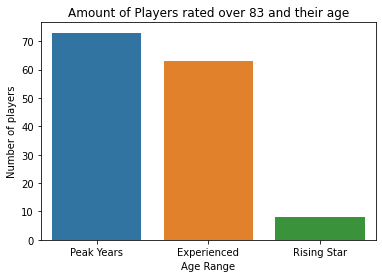

In [548]:
fig, ax1 = plt.subplots()

graph = sns.countplot(ax=ax1, data=top_players, x='Player Level', order=top_players['Player Level'].value_counts().head(20).index,)

ax1.set(xlabel='Age Range',ylabel='Number of players',title='Amount of Players rated over 83 and their age',)
graph.set_xticklabels(graph.get_xticklabels())

[Text(0, 0, 'Right'), Text(1, 0, 'Left')]

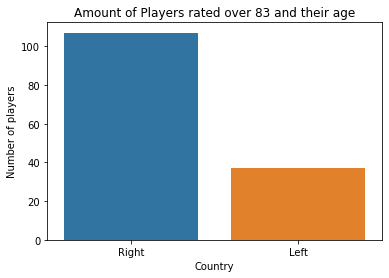

In [547]:
fig, ax1 = plt.subplots()

graph = sns.countplot(ax=ax1, data=top_players, x='preferred_foot', order=top_players['preferred_foot'].value_counts().head(20).index,)

ax1.set(xlabel='Country',ylabel='Number of players',title='Amount of Players rated over 83 and their age',)
graph.set_xticklabels(graph.get_xticklabels())

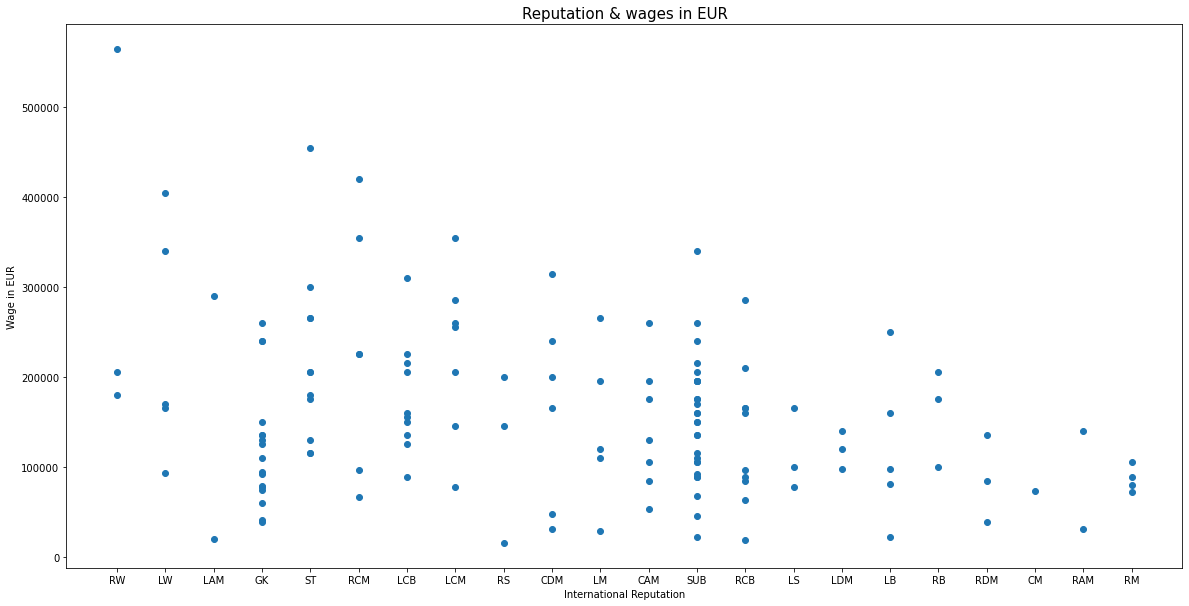

In [557]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x=top_players['club_position'], y=top_players['wage_euro'] )
plt.xlabel("International Reputation") 
plt.ylabel("Wage in EUR")
plt.title("Reputation & wages in EUR", fontsize = 15)
plt.show()